In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [3]:
# Task 1: Read JSONL and convert to DataFrame
data = []
with open("datasets/small-117M.train.jsonl", "r") as f:
    for line in f:
        data.append(json.loads(line))




In [4]:
# Convert data to DataFrame
gpt_df = pd.DataFrame(data)



In [6]:
print(gpt_df)

            id                                               text  length  \
0            1  is one of many that have been struggling with ...    1024   
1            2  refine. 135 SHARES Share Tweet\n\nIt is tumult...    1024   
2            3  The fate of a pig was not decided until now, b...    1024   
3            4  DoJ's scheduled attacks are started without E+...     795   
4            5  - Virginian Journal blog\n\nTHE PRESIDENT OF T...    1024   
...        ...                                                ...     ...   
249995  249996  \nYou know, somebody has got to get it sorted ...    1024   
249996  249997  The scenes of citizens of Kannam got very full...     504   
249997  249998  86 x 36 cm\n\nPrint\n\n2 Prep Time 20 mins Coo...      68   
249998  249999  Orio on line. In his 1997 novel 'The Dark Towe...     792   
249999  250000  ? Yes, please leave us a comment if you think ...      15   

        ended  
0       False  
1       False  
2       False  
3        Tr

In [7]:
# Task 2: Data Exploration with Python
# View the first few rows of the dataset
print(gpt_df.head())



   id                                               text  length  ended
0   1  is one of many that have been struggling with ...    1024  False
1   2  refine. 135 SHARES Share Tweet\n\nIt is tumult...    1024  False
2   3  The fate of a pig was not decided until now, b...    1024  False
3   4  DoJ's scheduled attacks are started without E+...     795   True
4   5  - Virginian Journal blog\n\nTHE PRESIDENT OF T...    1024  False


In [8]:
# Generate summary statistics
print()
print("Generate summary statistics")
print()
print(gpt_df.describe())
print()




Generate summary statistics

                  id         length
count  250000.000000  250000.000000
mean   125000.500000     683.446612
std     72168.927986     376.414341
min         1.000000       0.000000
25%     62500.750000     310.000000
50%    125000.500000     874.000000
75%    187500.250000    1024.000000
max    250000.000000    1112.000000



In [9]:
# Identify data types and missing values
print()
print("Identify data types and missing values")
print()
print(gpt_df.info())
print()




Identify data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      250000 non-null  int64 
 1   text    250000 non-null  object
 2   length  250000 non-null  int64 
 3   ended   250000 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 6.0+ MB
None



In [10]:
# Check for missing values in each column
missing_values = gpt_df.isnull().sum()

# Display the number of missing values in each column
print(missing_values)

id        0
text      0
length    0
ended     0
dtype: int64



Visualize the data distribution



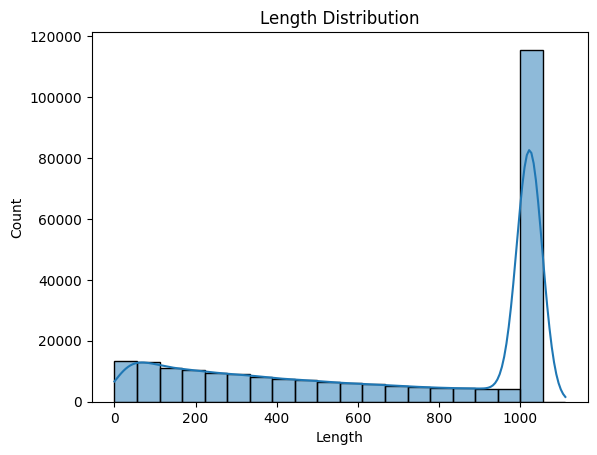

In [10]:
# Visualize the data distribution
print()
print("Visualize the data distribution")
print()

sns.histplot(gpt_df['length'], bins=20, kde=True)
plt.title('Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()



In [ ]:
# From above plot we can see the text Length distribution from 1000 has more count when compared to previous text length distributions.

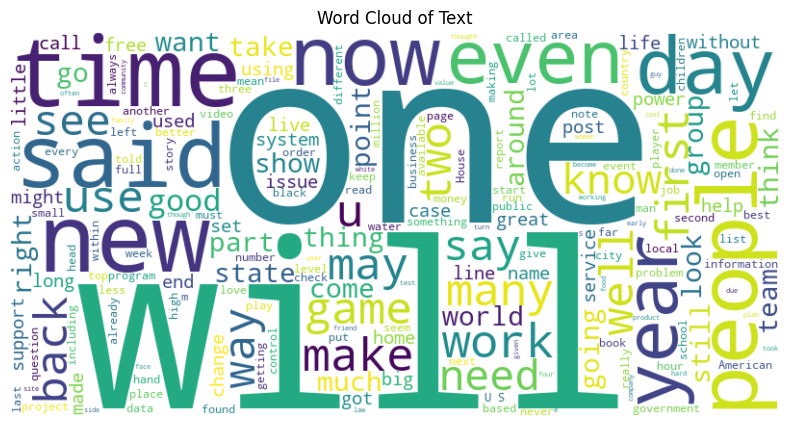

In [12]:
# Select the first few rows from the DataFrame to process easily
num_rows_to_use = 2000 

text_combined = ' '.join(gpt_df['text'][:num_rows_to_use])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Text')
plt.axis('off')
plt.show()



In [ ]:
#Note : Above wordcloud is from first few rows

In [5]:
# Handle missing values in the "length" column by replacing with the median
gpt_df["length"].fillna(gpt_df["length"].median(), inplace=True)

print("Post Data pre processing")
print()
print(gpt_df.head(5))
print()

Post Data pre processing

   id                                               text  length  ended
0   1  is one of many that have been struggling with ...    1024  False
1   2  refine. 135 SHARES Share Tweet\n\nIt is tumult...    1024  False
2   3  The fate of a pig was not decided until now, b...    1024  False
3   4  DoJ's scheduled attacks are started without E+...     795   True
4   5  - Virginian Journal blog\n\nTHE PRESIDENT OF T...    1024  False



In [13]:
# Task 4: Implement Machine Learning Models with Python
print("Implement Machine Learning Models with Python")
print()
# Separate features (X) and target (y)
X = gpt_df.drop(columns=["id", "text", "ended"])
y = gpt_df["ended"]


Implement Machine Learning Models with Python



In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data after split")
print("X_train")
print(X_train)
print("X_test")
print(X_test)
print("y_train")
print(y_train)
print("y_test")
print(y_test)
print()

Data after split
X_train
        length
75381     1024
65569      775
163473     202
90518      195
138866     114
...        ...
119879      96
103694     446
131932    1024
146867      39
121958     670

[200000 rows x 1 columns]
X_test
        length
38683     1024
64939     1024
3954        18
120374    1024
172861     339
...        ...
179545     333
222647     671
171823    1024
135782      37
208380    1024

[50000 rows x 1 columns]
y_train
75381     False
65569      True
163473     True
90518      True
138866     True
          ...  
119879     True
103694     True
131932    False
146867     True
121958     True
Name: ended, Length: 200000, dtype: bool
y_test
38683     False
64939     False
3954       True
120374    False
172861     True
          ...  
179545     True
222647     True
171823    False
135782     True
208380    False
Name: ended, Length: 50000, dtype: bool



In [14]:

# Create and fit the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

print()
print("SVM Model")
print(svm_model)
print()




SVM Model
SVC(kernel='linear', random_state=42)



In [15]:
# Create and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print()
print("Random Forest Model")
print(rf_model)
print()


Random Forest Model
RandomForestClassifier(random_state=42)



In [16]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    # Evaluation metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Print evaluation results
    print("Model Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(confusion)

In [17]:
# Evaluate the SVM model
print("SVM Model:")
evaluate_model(svm_model, X_test, y_test)

SVM Model:
Model Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[22645     0]
 [   54 27301]]


In [18]:
# Evaluate the Random Forest model
print("Random Forest Model:")
evaluate_model(rf_model, X_test, y_test)

Random Forest Model:
Model Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[22645     0]
 [   13 27342]]


In [ ]:
#Comparison of Models

# Both SVM and Random Forest models seem to be performing extremely well, as indicated by their evaluation metrics. Both models have an accuracy, precision, recall, and F1 score of 1.00, which means they are achieving perfect performance on the given evaluation data.

#The confusion matrices show the following results:

#For SVM:

#True Positives (TP): 27301
#True Negatives (TN): 22645
#False Positives (FP): 0
#False Negatives (FN): 54

#For Random Forest:

#True Positives (TP): 27342
#True Negatives (TN): 22645
#False Positives (FP): 0
#False Negatives (FN): 13

#In both cases, the models have correctly classified all the positive samples (TP) and all the negative samples (TN). There are no false positives or false negatives, which is why the precision, recall, and F1 score are all perfect.

In [19]:
# Task 5: Visualization with Python

# Data Visualization
print()
print("Visualization with Python")
print(svm_model)
print()


Visualization with Python
SVC(kernel='linear', random_state=42)



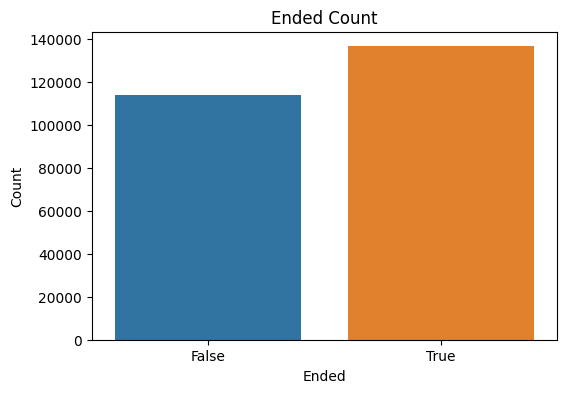

In [20]:

plt.figure(figsize=(6, 4))
sns.countplot(x="ended", data=gpt_df)
plt.title("Ended Count")
plt.xlabel("Ended")
plt.ylabel("Count")
plt.show()

In [ ]:
# From above Barplot we can see The x-axis represents the unique values in the "ended" column ("False" and "True"), and the y-axis represents the count of occurrences for each value with column True having more count

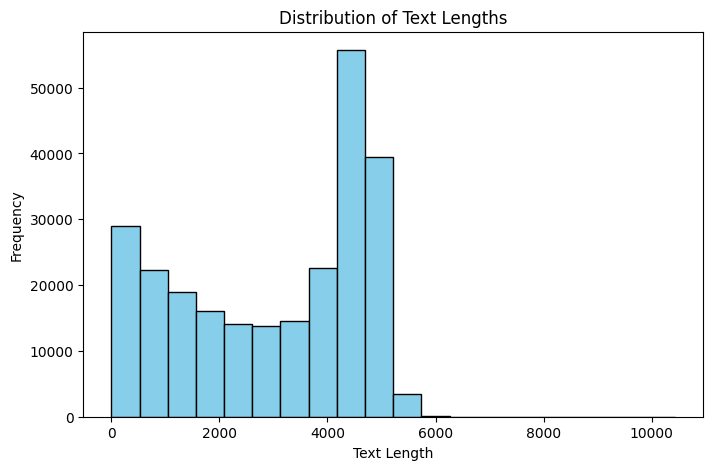

In [6]:
# Calculate the length of each text
text_lengths = gpt_df['text'].apply(len)

# Plot a bar plot to visualize the distribution of text lengths
plt.figure(figsize=(8, 5))
plt.hist(text_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Above plot shows the text length compared against frequency of each text.